In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("iris.csv")
print(df)
df = pd.read_csv("iris.csv",header=None)
print(df)
df.columns=['F1','F2','F3','F4','Target']  ##Assigning Columns name
print(df.shape)
print(df.head())

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]
       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 c

In [8]:
df['Target'].value_counts()   ## Number of class and count in each class

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

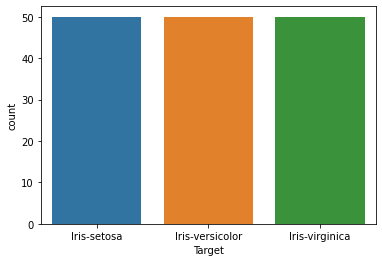

In [9]:
import seaborn as sns
sns.countplot(data=df,x='Target')

## EDA Exploratory Data Analysis

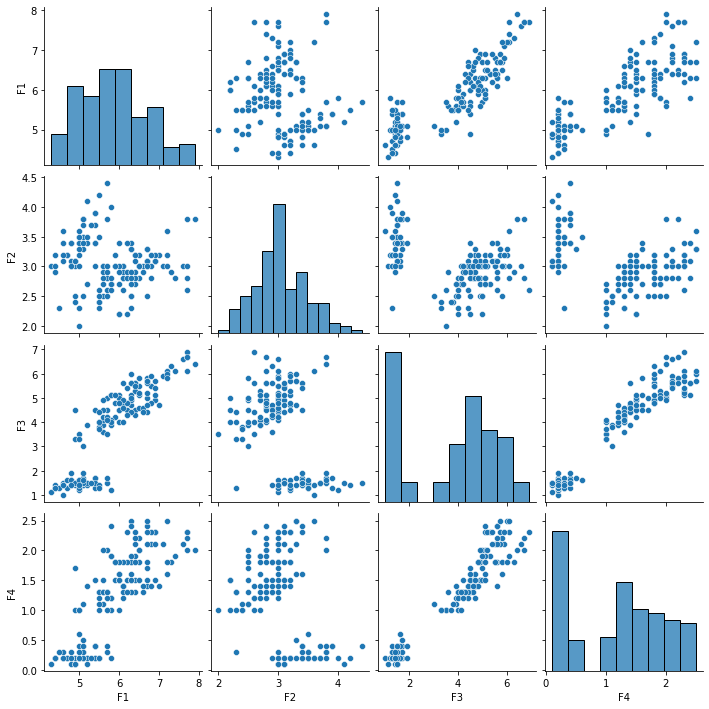

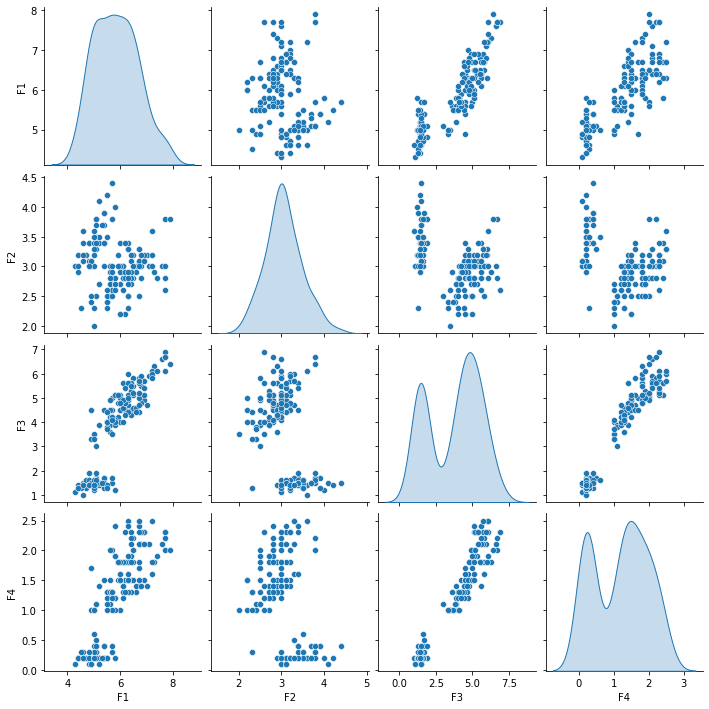

In [11]:
sns.pairplot(df[['F1','F2','F3','F4','Target']])
sns.pairplot(df[['F1','F2','F3','F4','Target']],diag_kind='kde')

## Correlation Analysis

<AxesSubplot:>

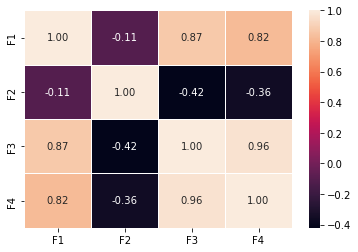

In [14]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',linewidths=1)

In [15]:
df

,F1,F2,F3,F4,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
df.isna().sum()   ## to check missing values              2Methoods: Delete and Impute

F1        0
F2        0
F3        0
F4        0
Target    0
dtype: int64

In [18]:
df.info()   ##Object means Categorical Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      150 non-null    float64
 1   F2      150 non-null    float64
 2   F3      150 non-null    float64
 3   F4      150 non-null    float64
 4   Target  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
x=df[['F1','F2','F3','F4']]
y=df['Target']

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Training and Testing Split

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


## Chapter-2
## Feature Scaline


## Method 1 : Standardization 

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)
##print(x_train_std)

## Method 2 : Normalization 

In [54]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train)
x_train_mms=mms.transform(x_train)
x_test_mms=mms.transform(x_test)


In [30]:
from sklearn.linear_model import Perceptron
clf=Perceptron()


In [31]:
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)


In [32]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc= ",train_acc)
print("Testing Acc = ",test_acc)


Training Acc=  0.6209677419354839
Testing Acc =  0.5740740740740741


In [49]:
clf.fit(x_train_std,y_train)
y_pred_train=clf.predict(x_train_std)
y_pred_test=clf.predict(x_test_std)

from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc= ",train_acc)
print("Testing Acc = ",test_acc)


Training Acc=  0.8476190476190476
Testing Acc =  0.7555555555555555


In [55]:
clf.fit(x_train_mms,y_train)
y_pred_train=clf.predict(x_train_mms)
y_pred_test=clf.predict(x_test_mms)

from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc= ",train_acc)
print("Testing Acc = ",test_acc)


Training Acc=  0.7428571428571429
Testing Acc =  0.6


In [58]:
from  sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc= ",train_acc)
print("Testing Acc = ",test_acc)

Training Acc=  0.9809523809523809
Testing Acc =  0.9777777777777777


In [65]:
from  sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc= ",train_acc)
print("Testing Acc = ",test_acc)

Training Acc=  0.9428571428571428
Testing Acc =  1.0


In [66]:
from  sklearn.svm import SVC
clf=SVC(kernel='rbf') #kernel='linear'
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc= ",train_acc)
print("Testing Acc = ",test_acc)

Training Acc=  0.9714285714285714
Testing Acc =  0.9777777777777777


In [73]:
from sklearn.metrics import classification_report
p=classification_report(y_test,y_pred_test)
print(p)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [74]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred_test)
print(cn)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


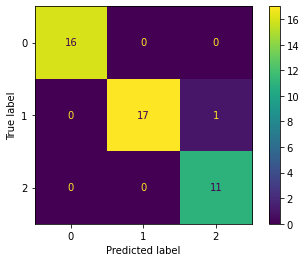

In [75]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(clf,x_test,y_test)


<AxesSubplot:>

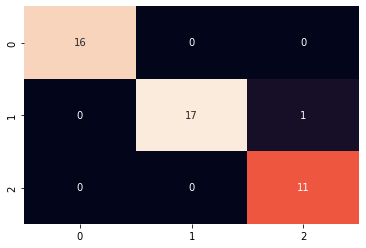

In [80]:
sns.heatmap(cn,annot=True,fmt='d',cbar=False)

# P2.
a) load wine dataset and understand the data
b) Implement various classifiers [Perceptron,LR,SVM,KMN,DT,NaiveBayes] and compare the testting accuracy(30% of whole data)
on wine dataset

In [2]:
from sklearn.datasets import load_wine
wine=load_wine()
x=wine.data
y=wine.target

In [11]:
print("Number of Samples  ",x.shape[0])
print("Number of features ",x.shape[1])
print("Classes = " , np.unique(y))
pd.DataFrame(y).value_counts()

Number of Samples   178
Number of features  13
Classes =  [0 1 2]


1    71
0    59
2    48
dtype: int64

<AxesSubplot:xlabel='0', ylabel='count'>

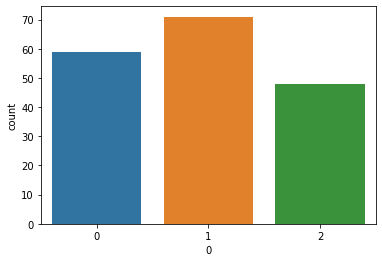

In [24]:
import seaborn as sns
sns.countplot(data=pd.DataFrame(y),x=0)
sns.countplot(data=df, x=y)

In [25]:
pd.DataFrame(x).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [28]:
pd.DataFrame(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)  ##random state-- whenever we run then same data will come
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(178, 13)
(124, 13)
(54, 13)


In [44]:
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(x_train,y_train)  ## Training
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Test Acc= ',accuracy_score(y_test,y_pred))

Test Acc=  0.5740740740740741


In [45]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(x_train,y_train)  ## Training
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Test Acc= ',accuracy_score(y_test,y_pred))

Test Acc=  0.9444444444444444


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)  ## Training
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Test Acc= ',accuracy_score(y_test,y_pred))


Test Acc=  0.8703703703703703


In [51]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
clf.fit(x_train,y_train)  ## Training
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Test Acc= ',accuracy_score(y_test,y_pred))


Test Acc=  0.7222222222222222


In [49]:
from  sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)  ## Training
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Test Acc= ',accuracy_score(y_test,y_pred))

Test Acc=  0.9444444444444444


In [50]:
from  sklearn.svm import SVC
clf=SVC(kernel='rbf') #kernel='linear'
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Test Acc= ',accuracy_score(y_test,y_pred))

Test Acc=  0.7777777777777778


In [60]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC

clf1=Perceptron()
clf2 =LogisticRegression()
clf3=DecisionTreeClassifier()
clf4 =KNeighborsClassifier()
clf5=GaussianNB()
clf6=SVC()

clf=[clf1,clf2,clf3,clf4,clf5,clf6]
name=['PERC','LR','DT','KNN','GNB','SVC']
acc={}
t={}
import time 
for classifier,classifier_name in zip(clf,name):
    st=time.time()
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    et=time.time()
    acc[classifier_name]=accuracy_score(y_pred,y_test)
    t[classifier_name]=et-st
    
print(acc)
max(acc.values())


{'PERC': 0.5740740740740741, 'LR': 0.9444444444444444, 'DT': 0.9444444444444444, 'KNN': 0.7222222222222222, 'GNB': 0.9444444444444444, 'SVC': 0.7777777777777778}


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9444444444444444

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC

clf1=Perceptron()
clf2 =LogisticRegression()
clf3=DecisionTreeClassifier()
clf4 =KNeighborsClassifier()
clf5=GaussianNB()
clf6=SVC()

clf=[clf1,clf2,clf3,clf4,clf5,clf6]
name=['PERC','LR','DT','KNN','GNB','SVC']
acc={}
t={}
import time 
for classifier,classifier_name in zip(clf,name):
    st=time.time()
    classifier.fit(x_train_std,y_train)
    y_pred=classifier.predict(x_test_std)
    et=time.time()
    acc[classifier_name]=accuracy_score(y_pred,y_test)
    t[classifier_name]=et-st
    
print(acc)
max(acc.values())

{'PERC': 1.0, 'LR': 1.0, 'DT': 0.9444444444444444, 'KNN': 1.0, 'GNB': 0.9444444444444444, 'SVC': 1.0}


1.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train)
x_train_mms=mms.transform(x_train)
x_test_mms=mms.transform(x_test)

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC

clf1=Perceptron()
clf2 =LogisticRegression()
clf3=DecisionTreeClassifier()
clf4 =KNeighborsClassifier()
clf5=GaussianNB()
clf6=SVC()

clf=[clf1,clf2,clf3,clf4,clf5,clf6]
name=['PERC','LR','DT','KNN','GNB','SVC']
acc={}
t={}
import time 
for classifier,classifier_name in zip(clf,name):
    st=time.time()
    classifier.fit(x_train_mms,y_train)
    y_pred=classifier.predict(x_test_mms)
    et=time.time()
    acc[classifier_name]=accuracy_score(y_pred,y_test)
    t[classifier_name]=et-st
    
print(acc)
max(acc.values())

# Ensemble Learning

In [74]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier   ##Bagging  (Bootstrap sample ) random sample with replacement
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier                 ## Boosting classifier
from sklearn.ensemble import VotingClassifier                                              ##  Stacking method
 
clf1=BaggingClassifier()
clf2=RandomForestClassifier()
clf3=ExtraTreesClassifier()
clf4=AdaBoostClassifier()
clf5=GradientBoostingClassifier()

clf6=VotingClassifier(estimators=[('Bag',clf1),('rf',clf2),('et',clf3),('ada',clf4),('gtb',clf5)],
                     voting='soft')

clf6.fit(x_train,y_train)
y_pred=clf6.predict(x_test)

from sklearn.metrics import accuracy_score
print('Test Acc = ', accuracy_score(y_test,y_pred))


Test Acc =  0.9629629629629629
